#### 1. Import  les bibliothèques nécessaires
#### 2. Charger les données
#### 3. Analyse de données
#### 4. Pretraitement des données
#### 5. Diviser les données en variables indep & variable dep
#### 6. Standardiser les données (les variables indep & dep)
#### 7. Construire le model du Deep Learning
#### 8. Evaluation du Model de Deep Learning
#### 9. Faire une simple Prediction
#### 10. Sauvegarder le Model du Deep Learning entrainé

# 1. Import  les bibliothèques nécessaires

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

# 2. Charger les données

In [31]:
data = pd.read_csv('data/Bank.csv')

# 3. Analyse de données

In [32]:
data.head()  # Affiche les 5 premières lignes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [33]:
data.info() # Informations sur les colonnes et types de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
data.describe() # Statistiques descriptives

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [35]:
data['y'].value_counts() # Vérifie la répartition de la variable cible

y
no     39922
yes     5289
Name: count, dtype: int64

In [36]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# 4. Pretraitement des données

In [37]:
# Encoder les colonnes catégoriques
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [38]:
# Encoder la variable cible `y`
data['y'] = LabelEncoder().fit_transform(data['y'])  # 0 = 'no', 1 = 'yes'

In [39]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


# 5. Diviser les données en variables indep & variable dep

In [40]:
X = data.drop('y', axis=1)  # Toutes les colonnes sauf `y`
y = data['y']  # La colonne cible

In [41]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [42]:
y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [43]:
X.shape

(45211, 16)

In [44]:
y.shape

(45211,)

In [45]:
# Diviser en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Standardiser les données (les variables indep & dep)

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Ajuste et transforme les données d'entraînement
X_test = scaler.transform(X_test)  # Transforme uniquement les données de test

# 7. Construire le model du Deep Learning

In [47]:
model = Sequential()

In [48]:
# Ajouter des couches (avec beaucoup de neurones pour la performance)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # Première couche cachée
model.add(Dropout(0.3))  # Dropout pour éviter l'overfitting
model.add(Dense(256, activation='relu'))  # Deuxième couche cachée
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))  # Troisième couche cachée
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Couche de sortie (1 neurone pour classification binaire)

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#afficher de l'architecture du reseau de neuronne
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         2,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 68,225 (266.50 KB)

 Trainable params: 68,225 (266.50 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
# 8. Entraîner et évaluer le modèle
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    verbose=1
)

Epoch 1/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9120 - loss: 0.1954 - val_accuracy: 0.8991 - val_loss: 0.2189
Epoch 2/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9132 - loss: 0.1905 - val_accuracy: 0.8974 - val_loss: 0.2230
Epoch 3/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9136 - loss: 0.1961 - val_accuracy: 0.8984 - val_loss: 0.2260
Epoch 4/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9142 - loss: 0.1921 - val_accuracy: 0.9020 - val_loss: 0.2199
Epoch 5/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9108 - loss: 0.1952 - val_accuracy: 0.9002 - val_loss: 0.2208
Epoch 6/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9167 - loss: 0.1877 - val_accuracy: 0.8985 - val_loss: 0.2216
Epoch 7/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9122 - loss: 0.1959 - val_accuracy: 0.9005 - val_loss: 0.2226
Epoch 8/200
905/905 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9132 - loss: 0.1906 - val_ac

# 8. Evaluation du Model de Deep Learning

In [50]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 0.22332648932933807
Test Accuracy: 0.9006966948509216


## Visualisation des performances

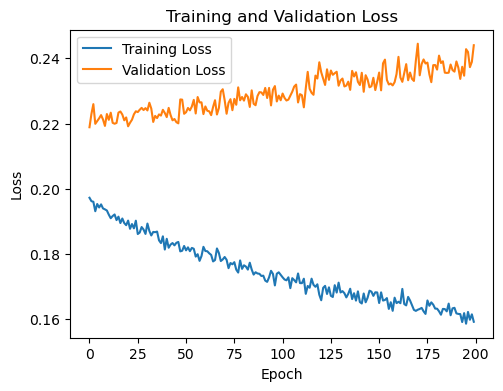

In [56]:
plt.figure(figsize=(12, 4))

# Plot de la perte (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

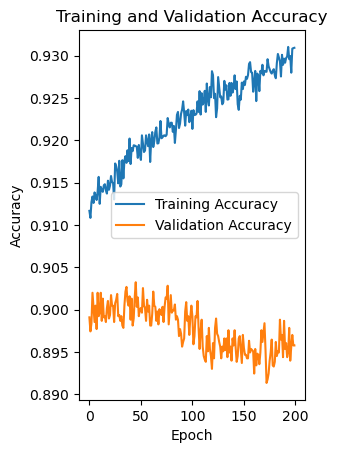

In [59]:
# Plot de la précision (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

# 9. Faire une simple Prediction

In [51]:
sample = X_test[1].reshape(1, -1)  # Prenons un exemple de test
prediction = model.predict(sample)[0][0]
print(f"Prediction: {prediction}")
print("Predicted Class:", "yes" if prediction > 0.5 else "no")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Prediction: 0.00171841646078974
Predicted Class: no


# 10. Sauvegarder le Model du Deep Learning entrainé


In [52]:
model.save('bank_deep_learning_model.h5')
print("Modèle sauvegardé sous le nom 'bank_deep_learning_model.h5'")

Modèle sauvegardé sous le nom 'bank_deep_learning_model.h5'
